In [144]:
# !pip install pandas
# !pip install numby
#!pip install matplotlib
#!pip install seaborn
# !pip install scikit-learn

In [145]:
import numpy as nu
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [146]:
df = pd.read_csv("autoscout24-germany-dataset.csv")

In [147]:
df.head()

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,9234,Mercedes-Benz,G 63 AMG,Gasoline,Automatic,Used,216619,850.0,2019
1,6500,Ferrari,812,Gasoline,Automatic,Demonstration,439900,799.0,2021
2,11000,Audi,R8,Gasoline,Automatic,Used,295000,799.0,2013
3,25100,Tesla,NaN,Electric,Automatic,Used,99999,795.0,2020
4,431,Ferrari,F12,Gasoline,Automatic,Used,1199900,775.0,2017


In [148]:
df.tail()

,mileage,make,model,fuel,gear,offerType,price,hp,year
46400,20,Others,NaN,Electric,NaN,Used,4850,NaN,2018
46401,5729,Mercedes-Benz,C 200,Gasoline,Automatic,Employee's car,36870,NaN,2020
46402,10,Fiat,500,Electric,Automatic,Demonstration,33690,NaN,2021
46403,10,Fiat,500C,Electric,Automatic,Demonstration,36890,NaN,2021
46404,363,Fiat,500C,Electric,Automatic,Demonstration,36890,NaN,2021


In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46405 entries, 0 to 46404
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mileage    46405 non-null  int64  
 1   make       46405 non-null  object 
 2   model      46262 non-null  object 
 3   fuel       46405 non-null  object 
 4   gear       46223 non-null  object 
 5   offerType  46405 non-null  object 
 6   price      46405 non-null  int64  
 7   hp         46376 non-null  float64
 8   year       46405 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 3.2+ MB


In [150]:
df.describe()

,mileage,price,hp,year
count,4.640500e+04,4.640500e+04,46376.000000,46405.000000
mean,7.117786e+04,1.657234e+04,132.990987,2016.012951
std,6.262531e+04,1.930470e+04,75.449284,3.155214
min,0.000000e+00,1.100000e+03,1.000000,2011.000000
25%,1.980000e+04,7.490000e+03,86.000000,2013.000000
50%,6.000000e+04,1.099900e+04,116.000000,2016.000000
75%,1.050000e+05,1.949000e+04,150.000000,2019.000000
max,1.111111e+06,1.199900e+06,850.000000,2021.000000


In [151]:
df.isnull().sum()

mileage        0
make           0
model        143
fuel           0
gear         182
offerType      0
price          0
hp            29
year           0
dtype: int64

In [152]:
df["model"] = df["model"].fillna(df["model"].max)
df["gear"] = df["gear"].fillna(df["gear"].max)
df["hp"] = df["hp"].fillna(df["hp"].mean)

In [153]:
df.isnull().sum()

mileage      0
make         0
model        0
fuel         0
gear         0
offerType    0
price        0
hp           0
year         0
dtype: int64

In [154]:
df.shape

(46405, 9)

In [155]:
df.duplicated().sum()

np.int64(2140)

In [156]:
df = df.drop_duplicates()

In [157]:
df.duplicated().sum()

np.int64(0)

In [158]:
df["price"] = pd.to_numeric(df["price"], errors="coerce")
df["price"] = df["price"].fillna(df["price"].mean())
df["price"] = df["price"].astype(int)
df["hp"] = pd.to_numeric(df["hp"], errors="coerce")
df["hp"] = df["hp"].fillna(df["hp"].mean())
df["hp"] = df["hp"].astype(int)

In [159]:
df['mileage'] = df["mileage"].astype(int)
df["price"] = df["price"].astype(int)
df["hp"] = df["hp"].astype(int)
df["year"] = df["year"].astype(int)

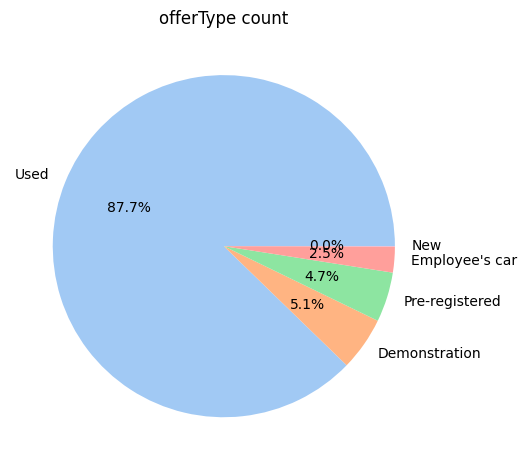

In [161]:
fuel_count = df["offerType"].value_counts()
plt.title("offerType count")
plt.pie(fuel_count,labels=fuel_count.index,autopct='%1.1f%%',colors=sns.color_palette("pastel"))
plt.tight_layout()
plt.show()

C:\Users\ao938\AppData\Local\Temp\ipykernel_17196\1850813615.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cars_price.values, y=top_cars_price.index, palette='Reds_r')


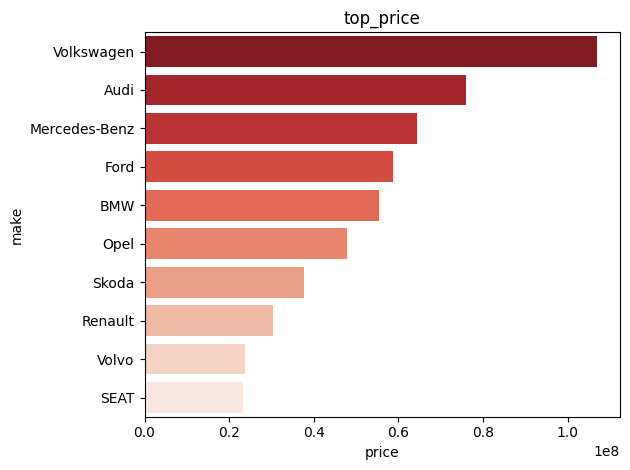

In [162]:
top_cars_price = df.groupby("make")["price"].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_cars_price.values, y=top_cars_price.index, palette='Reds_r')
plt.title('top_price')
plt.xlabel("price")
plt.ylabel("make")
plt.tight_layout()
plt.show()


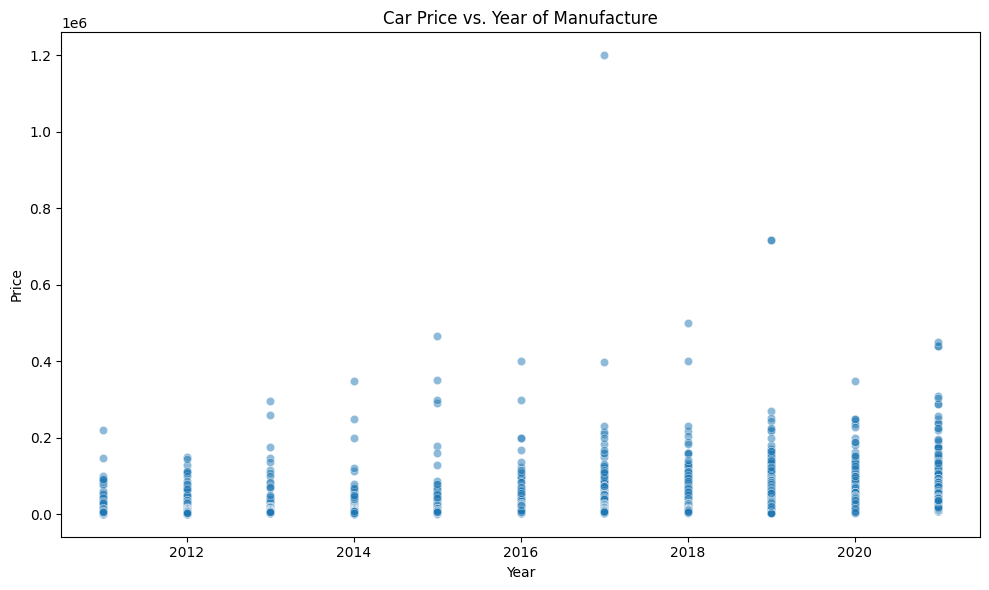

In [163]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='price', data=df, alpha=0.5)
plt.title('Car Price vs. Year of Manufacture')
plt.xlabel('Year')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

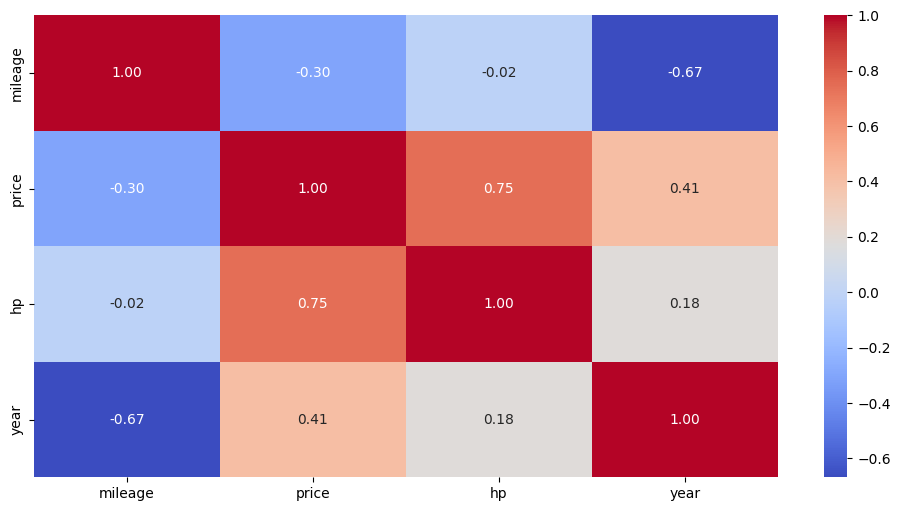

In [164]:
numeric_columns = df.select_dtypes(include=['number'])
plt.figure(figsize=(12, 6))
correlation_matrix = numeric_columns.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()